# 神经网络和机器学习之手写体数字识别

案例说明：手写体识别，使用卷积神经网络（CNN）

手写体识别，是人工智能中的经典难题。这个案例中，我们需要搭建神经网络，让计算机识别大量的手写体的图片，然后手写一张图片让计算机来识别。

用计算机处理手写体文字在之前一直是个难题，因为每个人的书写风格、书写习惯都不同，很难通过传统算法对书写内容进行判断。而卷积神经网络(Convolutional Neural Networks，简称 CNN)在处理这类问题上有非常好的表现，通过准备好的大量手写体训练样本，可以让计算机“学会”认识手写文字。

案例选择了keras框架，需要先安装keras和tensorflow。虚谷号教育版已经预装必要的库，可以直接使用。

本案例已经提供了训练好的模型，放在model文件夹中，文件名称为：3-model-vv.h5。不建议直接利用虚谷号进行训练，因为一个轮次需要30分钟左右，估计需要五个轮次以上，模型才能有较好的表现。如果想直接测试模型，请跳到“应用模型”环节，拍摄或者上传图片开始识别。

## 1.环境搭建

下面是安装命令：

pip install keras

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

建议选择清华源，速度将快很多。参考命令如下：

pip install -i https://pypi.tuna.tsinghua.edu.cn/simple tensorflow

## 2.数据准备

Mnist数据集是由Yann LeCun等人建立的一个手写体数据集，其中包括了60000张不同人书写的0-9数字组成的训练图片以及10000张测试图片，每张图片为28*28像素的灰度图。

开始导入数据集吧。第一次使用这个数据集，计算机要先通过网络下载，需要等待一定的时间。建议还是另外下载，放在“~/.keras/datasets/”中。

下载地址：https://s3.amazonaws.com/img-datasets/mnist.npz

建议上传到虚谷号的桌面，然后用命令复制：

! cp ~/Desktop/mnist.npz ~/.keras/datasets/mnist.npz

In [1]:
from keras import datasets
import numpy as np
(train_i,train_label),(test_i,test_label)=datasets.mnist.load_data()

Using TensorFlow backend.


卷积神经网络要求输入的数据至少4个维度，即索引、长度、高度和通道。mnist数据集中只有3个维度（图像是灰度的，只有一个通道），需要增加一个空的维度。numpy的`expand_dims`用于扩展数组的形状，`axis=-1`表示在最后加上一列。分别输出`train_i.shape`和`test_image.shape`比较一下。

In [13]:
train_image=np.expand_dims(train_i,axis=-1)
test_image=np.expand_dims(test_i,axis=-1) 

In [3]:
train_i.shape

(60000, 28, 28)

In [14]:
train_image.shape

(60000, 28, 28, 1)

使用Python的绘图工具，可以查看测试集与训练集的某张图片，以及对应的标签。

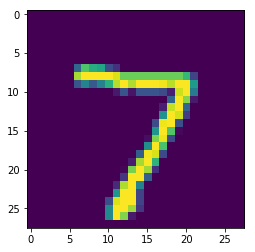

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(test_i[0])

In [7]:
print(test_label[0])

7


## 3.建立模型

卷积神经网络是一种带有卷积结构的多层神经网络。由于图像的空间联系往往是局部的，因此每个神经元不需要对全部的图像进行感知，只需要感知局部特征，并在更高层将这些不同感知的局部神经元连接起来综合处理即可。并且在卷积神经网络中，不同神经元之间的参数(卷积核)可以共享。因此，使用卷积神经网络可以有效的减少神经网络模型的训练参数，并且具有一定程度对图像位移、缩放、非线性变形的稳定性。

卷积神经网络还有个重要的思想是池化(Pooling)，也称为降采样或下采样，池化可以在保留图像显著特征的前提下减少数据处理量。一般池化方法有最大值池化(Max Pooling)和平均值池化(MEAN Pooling)。

卷积神经网络的结构一般是将输入的图像进行多次卷积、池化，在多次卷积、池化的的过程中图像的图像的尺寸会越来越小、特征会越来越明显，最后输入全连接层完成预测或者分类任务。

在keras中可以通过Conv2D和MaxPool方便的添加卷积层和最大层对图像进行卷积和池化，通过以下代码建立卷积神经网络模型并进行编译。

In [10]:
import keras
from keras import layers
model=keras.models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))  #第一层要设置输入图片的尺寸，即28*28像素、1个颜色通道
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D())
model.add(layers.Flatten()) #在全连接之前，需要将二维图片数据转换成一维数组
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.5))  #为了防止过拟合，Dropout层会随机的丢弃一部分神经网络连接
model.add(layers.Dense(10,activation='softmax'))  #使用softmax处理多分类问题

编译模型，并且在训练过程中打印出准确率（acc）指标。

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) 

## 4.训练模型

In [15]:
model.fit(x=train_image,y=train_label,batch_size=500,epochs=1,validation_data=(test_image,test_label))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 2047s 34ms/step - loss: 0.8264 - acc: 0.8559 - val_loss: 0.0658 - val_acc: 0.9785


由于图片的数据量比较庞大，而且卷积神经网络的训练需要大量的计算，因此每一轮次的训练需要较多的时间，不过仅仅训练5个轮次，神经网络模型就拥有了非常不错的表现，最后一次训练完成后，在训练集上的准确率达到了98.82%，在测试集上更是高达99.19%。而相比之下，仅使用全连接神经网络的训练效果准确率到达90%左右就很难再提升了。

train_label和test_label中分别存储训练集与测试集中每张手写体图片中的数字标签，可以通过代码查看测试集前10张图片的数字标签。

**注意：**在虚谷号上训练模型，一个轮次需要30分钟左右，一般经过5个轮次，识别率就不错了。

In [ ]:
print(test_label[0:10])

再利用模型来识别测试中前10张图片的内容，可以看到图片中的手写数字被成功的识别了出来。

In [ ]:
t=model.predict(test_image[0:10]).tolist()
for i in range(len(t)):
    tt=max(t[i])
    print(t[i].index(tt))

用predict_classes方法，直接输出识别结果。

In [ ]:
model.predict_classes(test_image[0:10])

## 5.保存模型

训练出来的模型，可以保存。下次使用的时候载入，还可以继续训练。一般保存为h5格式，需要先安装h5py。

命令如下：pip install h5py

In [38]:
model.save('./model/3-model-vv.h5')   # HDF5文件

## 6.应用模型

下次用这个语句载入，就可以直接使用了。

In [18]:
from keras.models import load_model  
model = load_model('./model/3-model-vv.h5')
#如果是高版本keras训练的模型，导入时要加上这个参数。
#model = load_model('./model/3-model-vv.h5', compile=False)

手写一个数字吧，用这个模型识别一下。这里提供了用摄像头拍摄照片的代码，也可以上传图片，名称为：test.jpg）。

**下面是利用虚谷号的摄像头拍摄图片的代码，没有摄像头请跳过，直接上传一张名为test.jpg的图片。**

In [28]:
import cv2
#基本函数1：获取摄像头内容保存为图片
def getcampic(fname):
    cap = cv2.VideoCapture(0)        # 打开摄像头
    ret, frame = cap.read()       # 读摄像头
    cv2.imwrite(fname,frame)
    cap.release()      
    cv2.destroyAllWindows() 
    return True
##调用getcampic函数
getcampic("test.jpg")

True

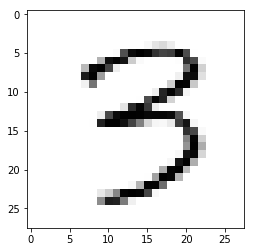

In [34]:
# 加载图像test.jpg
from keras.preprocessing import image
from keras.preprocessing.image import load_img
img = load_img('test.jpg',target_size=(28, 28),grayscale=True)
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(img)

准备好图片，识别后输出结果。

In [37]:
i_img=[]
import numpy as np
img =image.img_to_array(img,dtype="uint8")
i_img.append(img)
#发现训练集中的数据，都是黑底白字，而这里是白底黑字，于是先进行矩阵计算，实现图像的“反转”。
np_image = abs(np.array(i_img)-255)
result = model.predict_classes(np_image)
print(result)

[3]


至此，这个手写体数字的机器学习案例全部完成。